<a href="https://colab.research.google.com/github/smashingsophia/group20/blob/main/01_Exercise_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

We first load a dataset and examine its dimensions.

In [ ]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

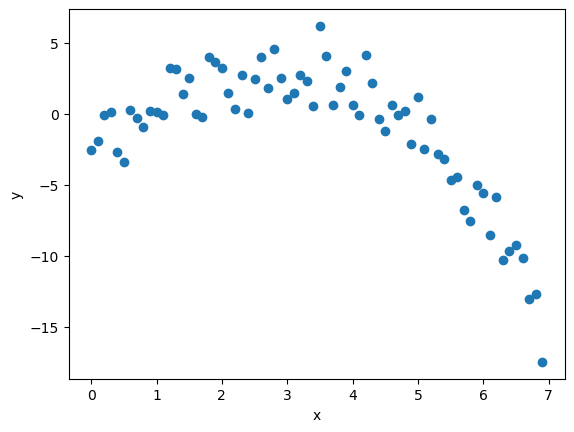

In [ ]:
import matplotlib.pyplot as plt

x = xy_data[:,0]
y = xy_data[:,1]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset.
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals.

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [ ]:
def polyreg(data_matrix, k):

    X = data_matrix[:, :-1]
    y = data_matrix[:, -1]
    n = X.shape[0]
    m = X.shape[1]

    X_design = np.ones((n, 1))
    for i in range(1, k + 1):
        X_design = np.concatenate((X_design, np.power(X, i)), axis=1)

    coef = np.linalg.lstsq(X_design, y, rcond=None)

    fit = np.dot(X_design, coef[0])

    residuals = y - fit


    return coef[0], fit, residuals

Use the tests below to check the outputs of the function you have written:

In [ ]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0]
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included.
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

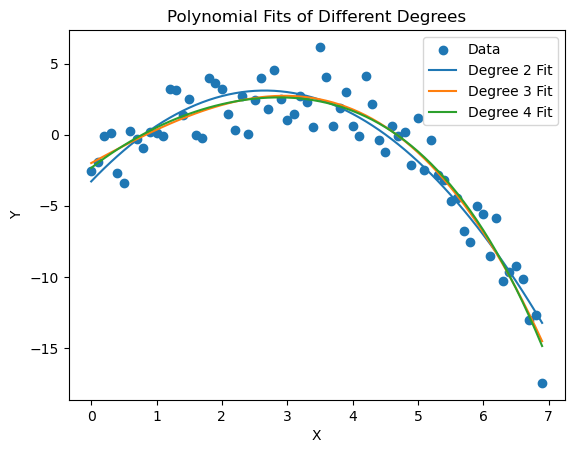

For k=2:
SSE: 172.1810252898855
R^2 Coefficient: 0.8876297774918224

For k=3:
SSE: 152.40580488915808
R^2 Coefficient: 0.9005356474205022

For k=4:
SSE: 151.22778969027118
R^2 Coefficient: 0.9013044535638857



In [ ]:
def calculate_sse(y_true, y_pred):

    return np.sum((y_true - y_pred) ** 2)

degrees = [2, 3, 4]
fits = []
coefs = []
sse_values = []
r2_values = []

for degree in degrees:
    coef, fit, residuals = polyreg(xy_data, degree)
    coefs.append(coef)
    fits.append(fit)
    sse = calculate_sse(xy_data[:, 1], fit)
    sse_values.append(sse)
    r2 = 1 - (np.sum(residuals ** 2) / np.sum((xy_data[:, 1] - np.mean(xy_data[:, 1])) ** 2))
    r2_values.append(r2)


plt.scatter(xy_data[:, 0], xy_data[:, 1], label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Fits of Different Degrees')
for i, degree in enumerate(degrees):
    plt.plot(xy_data[:, 0], fits[i], label=f'Degree {degree} Fit')
plt.legend()
plt.show()

for i, degree in enumerate(degrees):
    print(f"For k={degree}:")
    print(f"SSE: {sse_values[i]}")
    print(f"R^2 Coefficient: {r2_values[i]}")
    print()


 #### State which model you choose and briefly justify your choice.


 choose k=4 as SSE is the smallest and R^2 is the largest



### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot.
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

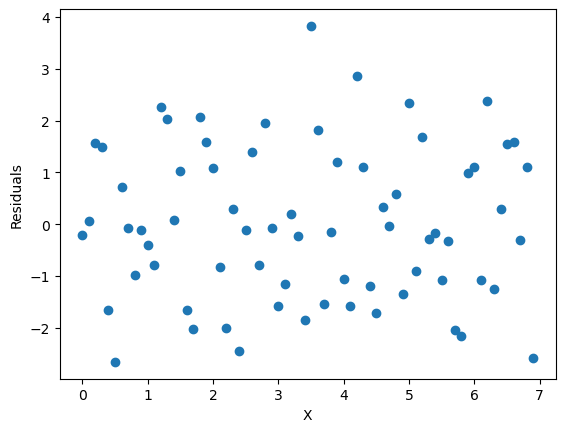

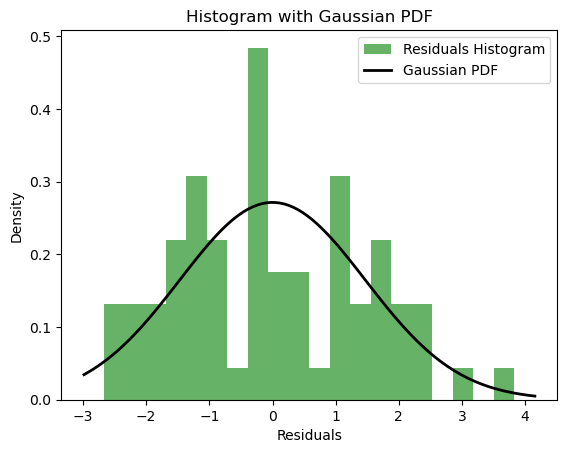

In [ ]:
from scipy.stats import norm

chosen_degree = 4  # Use the degree chosen in the previous part
chosen_coef = coefs[2]
chosen_fit = fits[2]
chosen_residuals = xy_data[:, 1] - chosen_fit

plt.scatter(xy_data[:, 0], chosen_residuals)
#plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()


plt.hist(chosen_residuals, bins=20, density=True, alpha=0.6, color='g', label='Residuals Histogram')
mu, sigma = np.mean(chosen_residuals), np.std(chosen_residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian PDF')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram with Gaussian PDF')
plt.legend()
plt.show()
